**10. Write a Python Program To impliment K- MEANS clustering**

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

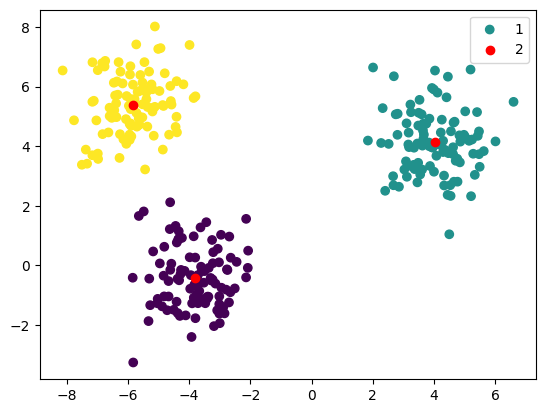

In [2]:
data,_ = make_blobs(n_samples=300)
m=KMeans(n_clusters=3,random_state=42,n_init='auto')
m.fit(data)
labels=m.labels_
set(labels)
centroids=m.cluster_centers_
plt.scatter(data[:,0],data[:,1],c=labels,cmap="viridis")
plt.scatter(centroids[:,0],centroids[:,1],c='red')
plt.legend(list(labels))
plt.show()

In [3]:
new_data=[[2,-4],[6,6],[2,5]]
result=m.predict(new_data)
for i, point in enumerate(new_data):
    print(f"The point {point} belongs to cluster {result[i]}.")

The point [2, -4] belongs to cluster 0.
The point [6, 6] belongs to cluster 1.
The point [2, 5] belongs to cluster 1.
